# <font color='red'> Harish Venkatesh

### Dataset
For two projects in this class, you will pick your datasets. To receive full credit for this part, your datasets should satisfy the following conditions: 

- At least 15 features (columns)
- At least 1000 instances (rows)
- At least two categorical/ordinal columns.
- Between 5 to 10 percent missing values across the dataset. 

Remember that you should have two separate datasets one for classification and one for regression tasks. 

### Project Description:
- Read data into Jupyter notebook, use pandas to import data into a data frame
- Preprocess data: Explore data, check for missing data and apply data scaling. Justify the type of scaling used.

### Regression Task:
- Apply all the regression models you've learned so far. If your model has a scaling parameter(s) use Grid Search to find the best scaling parameter. Use plots and graphs to help you get a better glimpse of the results. 
- Then use cross-validation to find average training and testing score. 
- Your submission should have at least the following regression models: KNN repressor, linear regression, Ridge, Lasso, polynomial regression, SVM both simple and with kernels. 
- Finally, find the best regressor for this dataset and train your model on the entire dataset using the best parameters and predict the target values for the test_set.

### Classification task:
- Decide about a good evaluation strategy and justify your choice.
- Find best parameters for the following classification models: KNN classification, Logistic Regression, Linear Support Vector Machine, Kerenilzed Support Vector Machine, Decision Tree. 
- Which model gives the best results?

### Deliverables:
- Submit IPython notebook. Use markdown to provide inline comments for this project.
- Submit only one notebook. Before submitting, make sure everything runs as expected. To check that, restart the kernel (in the menubar, select Kernel > Restart) and then run all cells (in the menubar, select Cell > Run All).
- Visualization encouraged. 

### Questions regarding the project:
- Post your queries related to project on discussion board on e-learning. There is a high possibility that your classmate has also faced the same problem and knows the solution. This is an effort to encourage collaborative learning and also making all the information available to everyone. We will also answer queries there. We will not be answering any project related queries through the mail.

# Dataset Description

### Link to the dataset used: https://www.kaggle.com/sameersmahajan/seattle-house-sales-prices

#### ID - Unique ID for each home sold
#### Date - Date of the home sale
#### Price - Price of the home sale
#### Bedrooms - Number of bedrooms
#### Bathrooms - Number of bathrooms (0.5 accounts for a room with a toilet but no shower)
#### Sqft_living - Square footage of the apartments 
#### Sqft_lot - Square footage of the land space
#### Floors - Number of floors
#### Waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
#### View - Index from 0 to 4 of how good the view of the property was
#### Condition - An index from 1 to 5 on the condition of the apartment
#### Grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of                                            construction and design, and 11-13 have a high quality level of construction and design
#### Sqft_above - The square footage of the interior housing space that is above ground level
#### Sqft_basement - The square footage of the interior housing space that is below ground level
#### Yr_built - The year the house was intially built
#### Yr_renovated - The year of the house's last renovation
#### Zipcode - What zipcode area the house is in
#### Lat - Latitude
#### Long - Longitude
#### Sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
#### Sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

###### To print out the output of all codes in a cell

In [50]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

###### Loading Libraries

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.model_selection import GridSearchCV

###### Loading Dataset

In [53]:
bm = pd.read_csv("house_sales.csv")

## Overview of Dataset

In [54]:
bm.shape
bm.head(10)

(21613, 21)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [55]:
bm.columns
bm.dtypes

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

id                 int64
date              object
price              int64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [56]:
bm.head().T

,0,1,2,3,4
id,7129300520,6414100192,5631500400,2487200875,1954400510
date,20141013T000000,20141209T000000,20150225T000000,20141209T000000,20150218T000000
price,221900,538000,180000,604000,510000
bedrooms,3,3,2,4,3
bathrooms,1,2.25,1,3,2
sqft_living,1180,2570,770,1960,1680
sqft_lot,5650,7242,10000,5000,8080
floors,1,2,1,1,1
waterfront,0,0,0,0,0
view,0,0,0,0,0


# Data Preprocessing

###### Converting the data types of columns accordingly for exploring the dataset easier
Columns 'id','bedrooms','bathrooms','floors','waterfront','view','condition','grade','yr_built','yr_renovated','zipcode' are categorical

In [57]:
bm[['id','bedrooms','bathrooms','floors','waterfront','view','condition','grade','yr_built','yr_renovated','zipcode']] = bm[['id','bedrooms','bathrooms','floors','waterfront','view','condition','grade','yr_built','yr_renovated','zipcode']].astype(object)

#### Dropping the column 'id' as it does not affect the prediction of house prices.

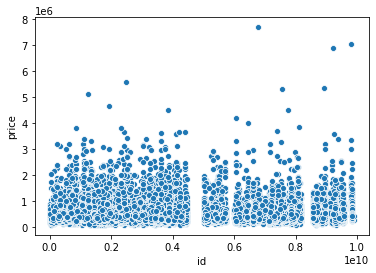

In [58]:
sns.scatterplot(x='id',y='price',data=bm)

In [59]:
bm_1 = bm.drop(['id'],axis=1)

## Creating and Handling Null Values

#### Null values are created randomly across the dataset

Creating a dataframe without column 'Price' so that null values are not created under the dependent column 'Price'

In [60]:
bm_price = bm_1['price']
bm_x = bm_1.drop(['price'],axis=1)
bm_x.shape

(21613, 19)

In [61]:
np.random.seed(0)
bm_x = bm_x.mask(np.random.random(bm_x.shape) < .051)

In [62]:
bm_x.isnull().sum()

date             1128
bedrooms         1099
bathrooms        1140
sqft_living      1120
sqft_lot         1069
floors           1061
waterfront       1096
view             1119
condition        1078
grade            1087
sqft_above       1127
sqft_basement    1080
yr_built         1031
yr_renovated     1177
zipcode          1128
lat              1087
long             1137
sqft_living15    1097
sqft_lot15       1123
dtype: int64

In [63]:
bm_x.isnull().sum().sum()

20984

20984 null values (approx. 5-6% of whole dataset) are created across the dataset

In [64]:
bm_x[bm_x.isnull().any(axis=1)]

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,3,1,1180.0,5650.0,1,0,0,3,7,1180.0,0.0,1955,0,98178,47.5112,NaN,1340.0,5650.0
1,20141209T000000,3,2.25,2570.0,7242.0,2,0,0,3,7,2170.0,400.0,1951,1991,98125,NaN,-122.319,1690.0,7639.0
3,20141209T000000,4,3,1960.0,5000.0,1,0,0,5,7,1050.0,910.0,1965,0,98136,47.5208,-122.393,1360.0,NaN
5,20140512T000000,4,NaN,5420.0,NaN,1,0,0,3,11,3890.0,1530.0,2001,0,98053,47.6561,-122.005,4760.0,101930.0
6,20140627T000000,3,2.25,1715.0,6819.0,2,0,0,3,7,1715.0,0.0,NaN,0,98003,47.3097,-122.327,2238.0,6819.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,20140521T000000,3,2.5,1530.0,1131.0,NaN,0,0,3,8,1530.0,0.0,2009,0,98103,47.6993,-122.346,1530.0,1509.0
21609,20150223T000000,4,2.5,NaN,5813.0,2,0,0,3,8,2310.0,NaN,NaN,0,98146,47.5107,-122.362,1830.0,7200.0
21610,20140623T000000,2,0.75,1020.0,1350.0,NaN,0,0,3,7,1020.0,0.0,2009,NaN,98144,47.5944,-122.299,1020.0,2007.0
21611,20150116T000000,3,2.5,1600.0,2388.0,2,0,NaN,3,8,1600.0,0.0,2004,0,98027,47.5345,-122.069,1410.0,1287.0


There are 13,637 rows with null values. Hence, it is not advisable to drop all the rows with null values.
Better method would be impute the null values wherever possible.

###### Combining the dataset with null values with the column "price"

In [65]:
bm_final = pd.concat([bm_x,bm_price],axis=1)

In [66]:
bm_final.shape
bm_final.isnull().sum()

(21613, 20)

date             1128
bedrooms         1099
bathrooms        1140
sqft_living      1120
sqft_lot         1069
floors           1061
waterfront       1096
view             1119
condition        1078
grade            1087
sqft_above       1127
sqft_basement    1080
yr_built         1031
yr_renovated     1177
zipcode          1128
lat              1087
long             1137
sqft_living15    1097
sqft_lot15       1123
price               0
dtype: int64

###### Creating two columns from the 'date' column - sale year and month

In [67]:
bm_final['sale_year'] = bm_final['date'].str[:4]

In [68]:
bm_final['sale_month'] = bm_final['date'].str[4:6]

In [69]:
bm_final.sale_year.fillna('nan',inplace=True)
bm_final.sale_month.fillna('nan',inplace=True)

In [70]:
bm_final['sale_year'].value_counts()
bm_final['sale_year'].unique()
bm_final['sale_month'].value_counts()
bm_final['sale_month'].unique()

2014    13890
2015     6595
nan      1128
Name: sale_year, dtype: int64

array(['2014', '2015', 'nan'], dtype=object)

05     2282
04     2110
06     2083
07     2081
08     1851
10     1779
03     1769
09     1682
12     1404
11     1330
02     1188
nan    1128
01      926
Name: sale_month, dtype: int64

array(['10', '12', '02', '05', '06', '01', '04', '03', '07', '08', '11',
       'nan', '09'], dtype=object)

###  'Sale_Year' and 'Sale_Month'

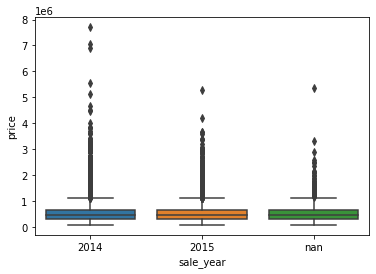

In [71]:
sns.boxplot(x='sale_year',y='price',data=bm_final)

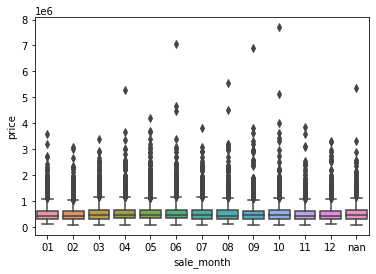

In [72]:
sns.boxplot(x='sale_month',y='price',data=bm_final)

In [73]:
bm_month = bm_final[['sale_month','price']]
bm_month.groupby('sale_month').mean()

,price
sale_month,
01,522241.234341
02,510867.186027
03,544219.409836
04,559923.530806
05,550857.780456
06,559200.218435
07,544410.164344
08,537774.264722
09,526874.860285


We can infer that the mean price of the houses over the month does not vary a lot. Hence, dropping the null values in the column 'sale_month'

In [74]:
bm_final = bm_final[bm_final.sale_month != 'nan']

In [75]:
bm_year = bm_final[['sale_year','price']]
bm_year.groupby('sale_year').mean()

,price
sale_year,
2014,539228.268035
2015,540955.486277


We can observe that the mean price of houses sold in 2015 is greater than those sold in 2014

From the analysis of "sale_year" column, we get to know that sales are made between the years 2014-2015. Also, from the plot, we can infer that the sales price are similar to those houses sold at 2015.

It would be advisable to impute the 'nan' values with 2015. But, before that we have to check the "year built" column so as to ensure year built is 'nan' or not for the rows with 'nan' under sale_year column

In [76]:
bm_final[(bm_final['sale_year']=='nan') & (bm_final['yr_built']=='nan')]

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,sale_year,sale_month


No rows with 'nan' in both columns 'yr_built' and 'sale_year'. Therefore, replacing null under 'sale_year' with '2015'

In [77]:
bm_final['sale_year'] = bm_final['sale_year'].replace({'nan':'2015'})

Only 2 years are present: 2014, 2015

Hence, assigning 0 and 1 respectively

In [78]:
bm_final['sale_year'] = bm_final['sale_year'].replace({'2014':'0'})
bm_final['sale_year'] = bm_final['sale_year'].replace({'2015':'1'})

In [79]:
bm_final['sale_year'].value_counts()

0    13890
1     6595
Name: sale_year, dtype: int64

### 'Bedrooms' and  'Bathrooms'

In [80]:
bm_final.bedrooms.fillna('nan',inplace=True)
bm_final.bathrooms.fillna('nan',inplace=True)

In [81]:
bm_final.head(20)

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,sale_year,sale_month
0,20141013T000000,3,1,1180.0,5650.0,1,0,0,3,7,...,1955,0,98178,47.5112,NaN,1340.0,5650.0,221900,0,10
1,20141209T000000,3,2.25,2570.0,7242.0,2,0,0,3,7,...,1951,1991,98125,NaN,-122.319,1690.0,7639.0,538000,0,12
2,20150225T000000,2,1,770.0,10000.0,1,0,0,3,6,...,1933,0,98028,47.7379,-122.233,2720.0,8062.0,180000,1,02
3,20141209T000000,4,3,1960.0,5000.0,1,0,0,5,7,...,1965,0,98136,47.5208,-122.393,1360.0,NaN,604000,0,12
4,20150218T000000,3,2,1680.0,8080.0,1,0,0,3,8,...,1987,0,98074,47.6168,-122.045,1800.0,7503.0,510000,1,02
5,20140512T000000,4,nan,5420.0,NaN,1,0,0,3,11,...,2001,0,98053,47.6561,-122.005,4760.0,101930.0,1225000,0,05
6,20140627T000000,3,2.25,1715.0,6819.0,2,0,0,3,7,...,NaN,0,98003,47.3097,-122.327,2238.0,6819.0,257500,0,06
7,20150115T000000,3,1.5,1060.0,9711.0,1,0,0,3,7,...,1963,0,98198,47.4095,-122.315,1650.0,9711.0,291850,1,01
8,20150415T000000,3,1,1780.0,7470.0,1,0,0,3,7,...,1960,0,NaN,47.5123,-122.337,1780.0,8113.0,229500,1,04
9,20150312T000000,3,nan,1890.0,6560.0,2,0,0,NaN,7,...,2003,0,98038,47.3684,-122.031,2390.0,7570.0,323000,1,03


In [82]:
bm_final['bedrooms'].unique()
bm_final['bedrooms'].value_counts()
bm_final['bathrooms'].unique()
bm_final['bathrooms'].value_counts()

array([3, 2, 4, 5, 'nan', 1, 6, 7, 0, 8, 9, 11, 10, 33], dtype=object)

3      8863
4      6199
2      2452
5      1431
nan    1046
6       243
1       180
7        36
8        13
0        12
9         5
10        3
33        1
11        1
Name: bedrooms, dtype: int64

array([1.0, 2.25, 3.0, 2.0, 'nan', 1.5, 2.5, 1.75, 2.75, 3.25, 4.0, 3.5,
       0.75, 4.75, 5.0, 4.25, 4.5, 3.75, 0.0, 1.25, 5.25, 6.0, 0.5, 5.5,
       6.75, 5.75, 8.0, 7.5, 7.75, 6.25, 6.5], dtype=object)

2.5     4845
1.0     3466
1.75    2747
2.25    1837
2.0     1726
1.5     1286
nan     1073
2.75    1071
3.0      671
3.5      663
3.25     517
3.75     139
4.0      119
4.5       87
4.25      73
0.75      67
4.75      19
5.0       19
5.25      13
0.0        9
5.5        9
1.25       7
6.0        6
5.75       4
0.5        4
8.0        2
6.75       2
7.75       1
6.25       1
7.5        1
6.5        1
Name: bathrooms, dtype: int64

From above description of the number of bedrooms and bathrooms, we are able to find that there are houses with zero bedrooms and bathrooms, which is practically not possible. Hence, those rows can be dropped.

In [83]:
bm_final = bm_final[bm_final.bedrooms != 0]
bm_final = bm_final[bm_final.bathrooms != 0]

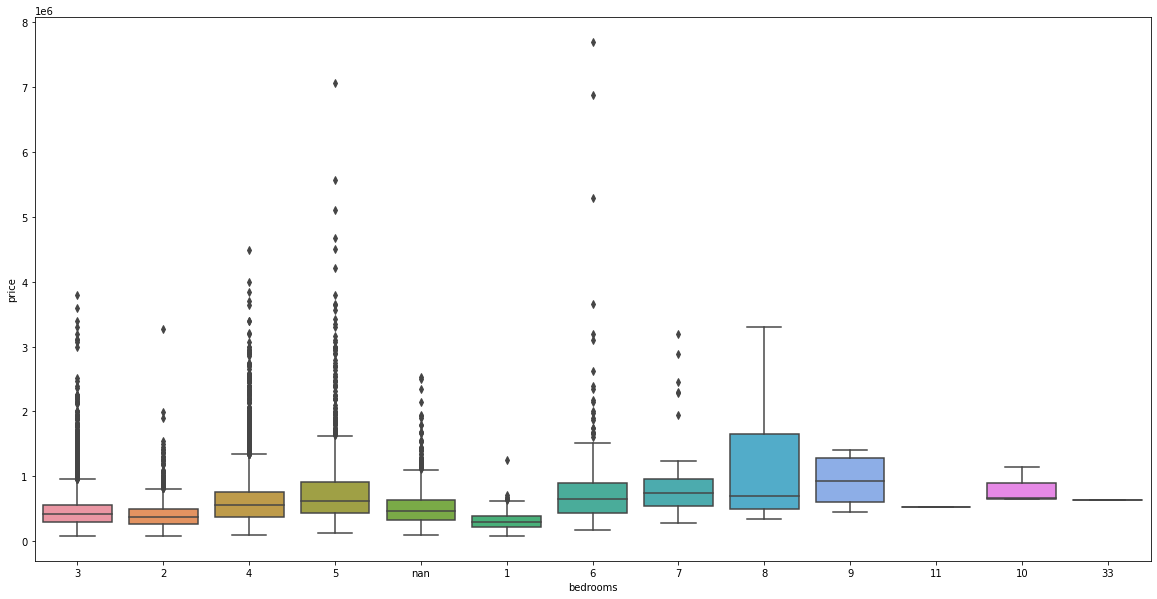

In [84]:
a4_dims = (20,10)
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(x='bedrooms',y='price',data=bm_final)

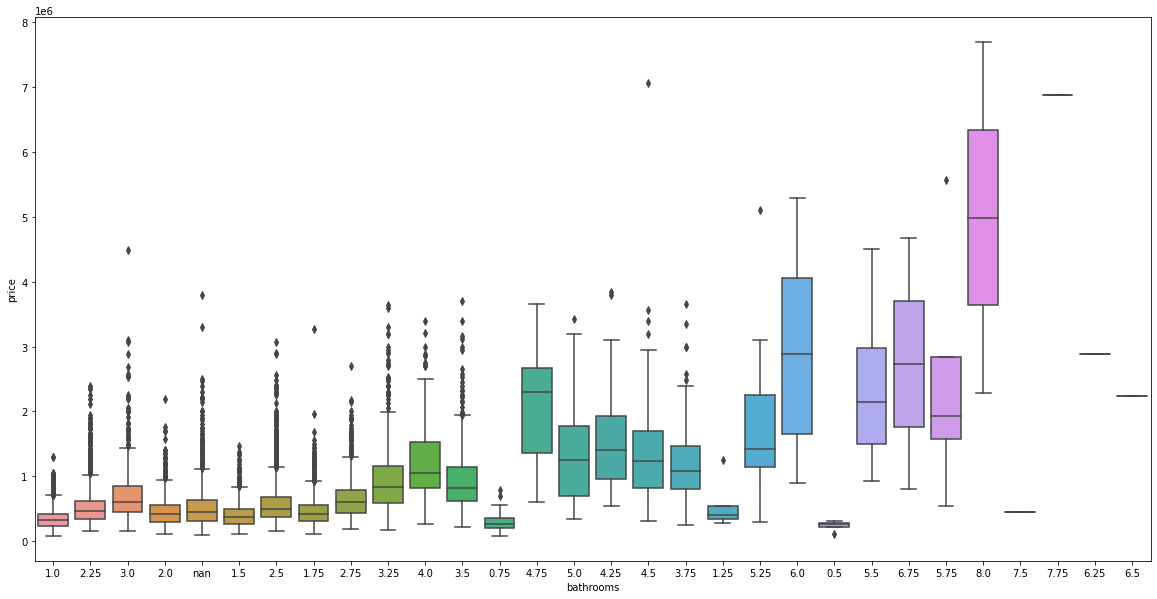

In [85]:
a4_dims = (20,10)
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(x='bathrooms',y='price',data=bm_final)

Based on the plots, we can infer that the null values for the bedrooms can be replaced with '3' and for bathrooms with '2.25'

In [86]:
bm_final['bedrooms'] = bm_final['bedrooms'].replace({'nan':3})
bm_final['bathrooms'] = bm_final['bathrooms'].replace({'nan':2.25})

In [87]:
bm_final['bedrooms'].unique()
bm_final['bedrooms'].value_counts()
bm_final['bathrooms'].unique()
bm_final['bathrooms'].value_counts()
bm_final.shape

array([ 3,  2,  4,  5,  1,  6,  7,  8,  9, 11, 10, 33], dtype=int64)

3     9908
4     6199
2     2452
5     1431
6      243
1      178
7       36
8       13
9        5
10       3
11       1
33       1
Name: bedrooms, dtype: int64

array([1.  , 2.25, 3.  , 2.  , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  , 3.5 ,
       0.75, 4.75, 5.  , 4.25, 4.5 , 3.75, 1.25, 5.25, 6.  , 0.5 , 5.5 ,
       6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

2.50    4843
1.00    3465
2.25    2909
1.75    2747
2.00    1726
1.50    1285
2.75    1071
3.00     671
3.50     663
3.25     517
3.75     139
4.00     119
4.50      87
4.25      73
0.75      66
4.75      19
5.00      19
5.25      13
5.50       9
1.25       7
6.00       6
5.75       4
0.50       4
8.00       2
6.75       2
6.25       1
7.50       1
7.75       1
6.50       1
Name: bathrooms, dtype: int64

(20470, 22)

In [88]:
bm_final.isnull().sum()

date                0
bedrooms            0
bathrooms           0
sqft_living      1062
sqft_lot         1022
floors           1000
waterfront       1025
view             1078
condition        1019
grade            1031
sqft_above       1079
sqft_basement    1030
yr_built          971
yr_renovated     1102
zipcode          1060
lat              1027
long             1078
sqft_living15    1041
sqft_lot15       1059
price               0
sale_year           0
sale_month          0
dtype: int64

### "sqft_living"

In [89]:
bm_final['sqft_living'].isnull().sum()
bm_final['sqft_living'].describe()
bm_final['sqft_living'].median()

1062

count    19408.000000
mean      2081.284367
std        917.777180
min        370.000000
25%       1430.000000
50%       1920.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

1920.0

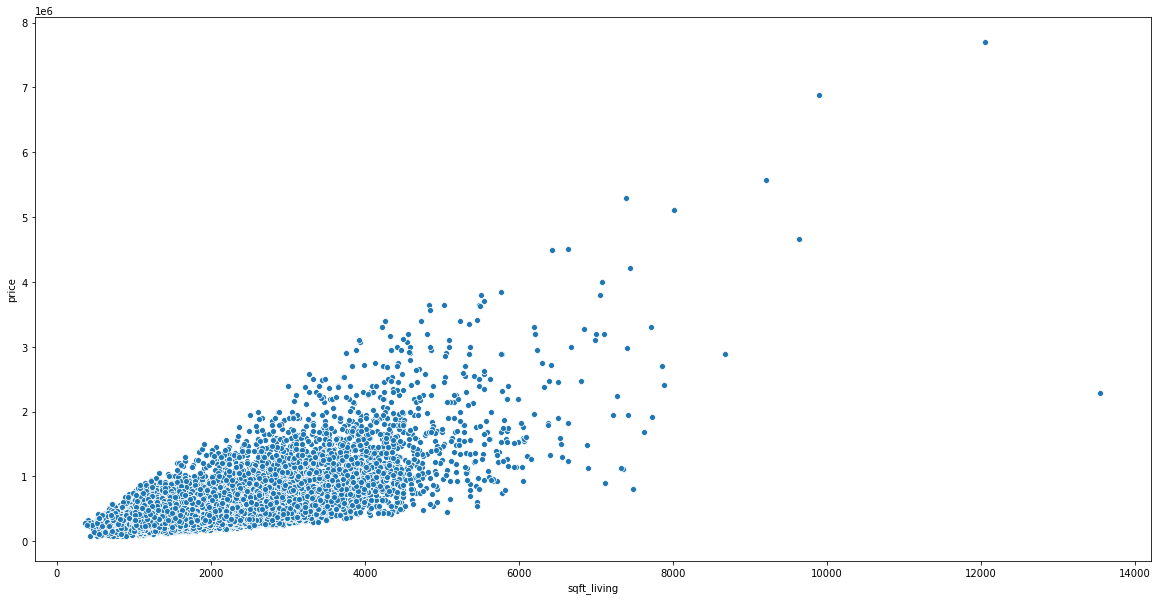

In [90]:
a4_dims = (20,10)
fig, ax = plt.subplots(figsize=a4_dims)
sns.scatterplot(x='sqft_living',y='price',data=bm_final)

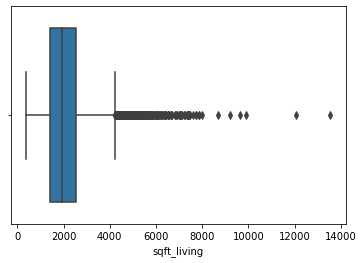

In [91]:
sns.boxplot(x='sqft_living',data=bm_final)

Since, we are replacing the null values with median as there are outliers

In [92]:
bm_final['sqft_living']=bm_final['sqft_living'].fillna(bm_final['sqft_living'].median())

In [93]:
bm_final['sqft_living'].isnull().sum()

0

In [94]:
bm_final.isnull().sum()

date                0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot         1022
floors           1000
waterfront       1025
view             1078
condition        1019
grade            1031
sqft_above       1079
sqft_basement    1030
yr_built          971
yr_renovated     1102
zipcode          1060
lat              1027
long             1078
sqft_living15    1041
sqft_lot15       1059
price               0
sale_year           0
sale_month          0
dtype: int64

### 'sqft_lot'

In [95]:
bm_final['sqft_lot'].isnull().sum()
bm_final['sqft_lot'].describe()
bm_final['sqft_lot'].median()

1022

count    1.944800e+04
mean     1.506629e+04
std      4.177920e+04
min      5.200000e+02
25%      5.053750e+03
50%      7.620000e+03
75%      1.070400e+04
max      1.651359e+06
Name: sqft_lot, dtype: float64

7620.0

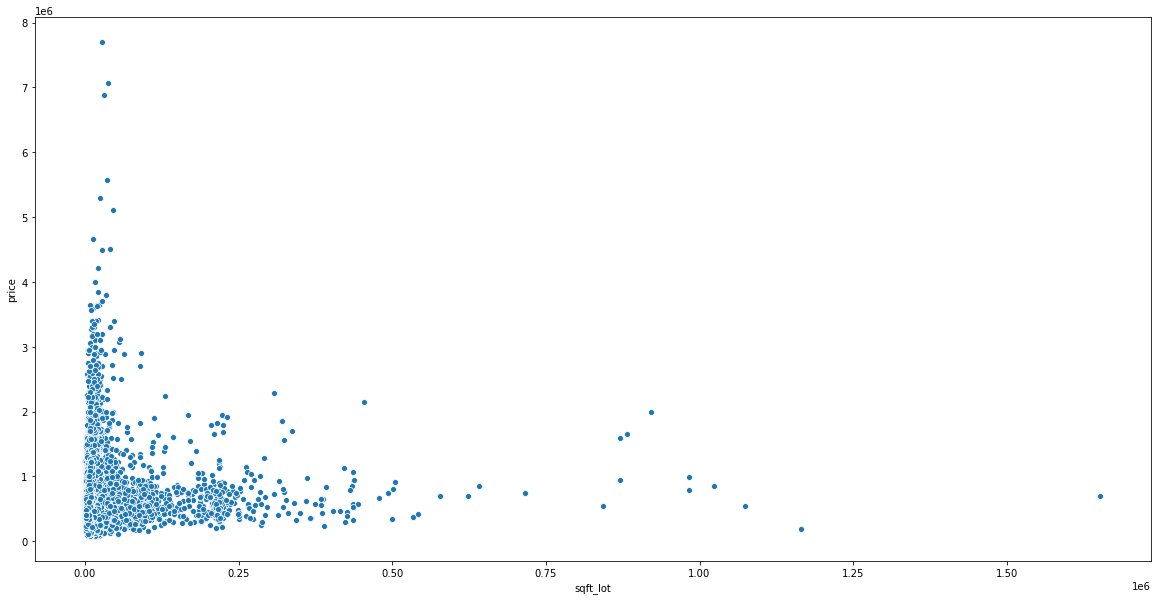

In [96]:
a4_dims = (20,10)
fig, ax = plt.subplots(figsize=a4_dims)
sns.scatterplot(x='sqft_lot',y='price',data=bm_final)

Since, outliers are present, imputing the null values with median of the column 'sqft_lot'

In [97]:
bm_final['sqft_lot']=bm_final['sqft_lot'].fillna(bm_final['sqft_lot'].median())
bm_final['sqft_lot'].isnull().sum()

0

In [98]:
bm_final.isnull().sum()

date                0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors           1000
waterfront       1025
view             1078
condition        1019
grade            1031
sqft_above       1079
sqft_basement    1030
yr_built          971
yr_renovated     1102
zipcode          1060
lat              1027
long             1078
sqft_living15    1041
sqft_lot15       1059
price               0
sale_year           0
sale_month          0
dtype: int64

### 'floors'

In [99]:
bm_final.floors.fillna('nan',inplace=True)

In [100]:
bm_final['floors'].value_counts()
bm_price_floors = bm_final[['floors','price']]
bm_price_floors.groupby('floors').mean()

1.0    9602
2.0    7436
1.5    1731
nan    1000
3.0     549
2.5     145
3.5       7
Name: floors, dtype: int64

,price
floors,
1.0,4.415906e+05
1.5,5.584669e+05
2.0,6.483285e+05
2.5,1.069188e+06
3.0,5.889418e+05
3.5,9.102143e+05
nan,5.388322e+05


We can see from the above table that the mean of those 'nan' floors is close to that of floors with 1.5

Hence, it is advisable to impute the nan's with 1.5

In [101]:
bm_final['floors'] = bm_final['floors'].replace({'nan':1.5})

In [102]:
bm_final['floors'].value_counts()

1.0    9602
2.0    7436
1.5    2731
3.0     549
2.5     145
3.5       7
Name: floors, dtype: int64

In [103]:
bm_final.isnull().sum()

date                0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       1025
view             1078
condition        1019
grade            1031
sqft_above       1079
sqft_basement    1030
yr_built          971
yr_renovated     1102
zipcode          1060
lat              1027
long             1078
sqft_living15    1041
sqft_lot15       1059
price               0
sale_year           0
sale_month          0
dtype: int64

### 'waterfront'

In [104]:
bm_final.waterfront.fillna('nan',inplace=True)
bm_final['waterfront'].value_counts()

0      19302
nan     1025
1        143
Name: waterfront, dtype: int64

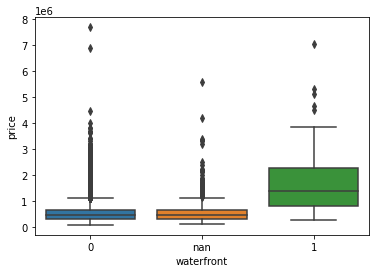

In [105]:
sns.boxplot(x='waterfront',y='price',data=bm_final)

Since, for both 'nan' and '0', they have the similar price ranges. We are imputing the nan's with 0

In [106]:
bm_final['waterfront'] = bm_final['waterfront'].replace({'nan':0})
bm_final['waterfront'].value_counts()

0    20327
1      143
Name: waterfront, dtype: int64

In [107]:
bm_final.isnull().sum()

date                0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view             1078
condition        1019
grade            1031
sqft_above       1079
sqft_basement    1030
yr_built          971
yr_renovated     1102
zipcode          1060
lat              1027
long             1078
sqft_living15    1041
sqft_lot15       1059
price               0
sale_year           0
sale_month          0
dtype: int64

### 'view'

In [108]:
bm_final.view.fillna('nan',inplace=True)

In [109]:
bm_final['view'].value_counts()

0      17520
nan     1078
2        846
3        444
1        299
4        283
Name: view, dtype: int64

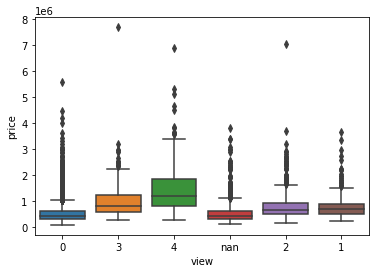

In [110]:
sns.boxplot(x='view',y='price',data=bm_final)

Since, for both 'nan' and '0', they have the similar price ranges. We are imputing the nan's with 0

In [111]:
bm_final['view'] = bm_final['view'].replace({'nan':0})
bm_final['view'].value_counts()

0    18598
2      846
3      444
1      299
4      283
Name: view, dtype: int64

In [112]:
bm_final.isnull().sum()

date                0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition        1019
grade            1031
sqft_above       1079
sqft_basement    1030
yr_built          971
yr_renovated     1102
zipcode          1060
lat              1027
long             1078
sqft_living15    1041
sqft_lot15       1059
price               0
sale_year           0
sale_month          0
dtype: int64

### 'condition'

In [113]:
bm_final.condition.fillna('nan',inplace=True)
bm_final['condition'].value_counts()

3      12584
4       5147
5       1544
nan     1019
2        147
1         29
Name: condition, dtype: int64

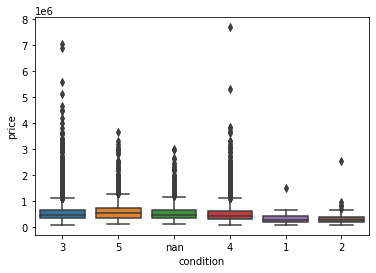

In [114]:
sns.boxplot(x='condition',y='price',data=bm_final)

In [115]:
bm_price_condition = bm_final[['condition','price']]
bm_price_condition.groupby('condition').mean()

,price
condition,
1,341067.241379
2,318611.489796
3,540408.542832
4,522513.078104
5,611373.721503
nan,550373.646712


Since, for both 'nan' and '3', they have the similar price ranges. We are imputing the nan's with 3

In [116]:
bm_final['condition'] = bm_final['condition'].replace({'nan':3})
bm_final['condition'].value_counts()
bm_final.isnull().sum()

3    13603
4     5147
5     1544
2      147
1       29
Name: condition, dtype: int64

date                0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade            1031
sqft_above       1079
sqft_basement    1030
yr_built          971
yr_renovated     1102
zipcode          1060
lat              1027
long             1078
sqft_living15    1041
sqft_lot15       1059
price               0
sale_year           0
sale_month          0
dtype: int64

### 'grade'

In [117]:
bm_final.grade.fillna('nan',inplace=True)
bm_final['grade'].value_counts()

7      8098
8      5477
9      2330
6      1818
nan    1031
10     1027
11      352
5       218
12       79
4        26
13       13
3         1
Name: grade, dtype: int64

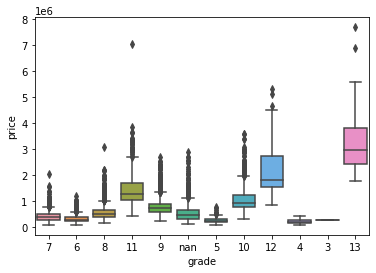

In [118]:
sns.boxplot(x='grade',y='price',data=bm_final)

In [119]:
bm_final['grade'] = bm_final['grade'].replace({1:0,3:0,4:1,5:1,6:1,7:2,8:3,9:3,10:3,11:4,12:4,13:4})

bm_final['grade'].unique()

array([2, 1, 3, 4, 'nan', 0], dtype=object)

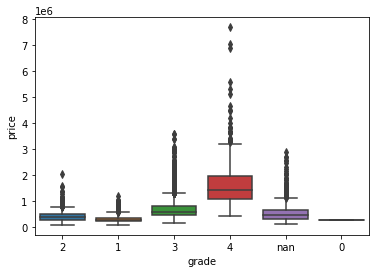

In [120]:
sns.boxplot(x='grade',y='price',data=bm_final)

In [121]:
bm_price_grade = bm_final[['grade','price']]
bm_price_grade.groupby('grade').mean()

,price
grade,
0,2.620000e+05
1,2.956212e+05
2,4.026813e+05
3,6.656492e+05
4,1.690680e+06
nan,5.331155e+05


In [122]:
bm_final['grade'].value_counts()

3      8834
2      8098
1      2062
nan    1031
4       444
0         1
Name: grade, dtype: int64

Since, grade 'nan' has a different mean price. And 'grade' is an ordinal variable. Assuming higher the grade, higher the price.

We can impute nan as a new category '2.5'

In [123]:
bm_final['grade'] = bm_final['grade'].replace({'nan':2.5})

In [124]:
bm_final['grade'].value_counts()

3.0    8834
2.0    8098
1.0    2062
2.5    1031
4.0     444
0.0       1
Name: grade, dtype: int64

In [125]:
bm_final.isnull().sum()

date                0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above       1079
sqft_basement    1030
yr_built          971
yr_renovated     1102
zipcode          1060
lat              1027
long             1078
sqft_living15    1041
sqft_lot15       1059
price               0
sale_year           0
sale_month          0
dtype: int64

### 'sqft_above', 'sqft_basement'

In [126]:
bm_final['sqft_above'].describe()
bm_final['sqft_basement'].describe()

count    19391.000000
mean      1788.368934
std        827.641928
min        380.000000
25%       1190.000000
50%       1560.000000
75%       2210.000000
max       9410.000000
Name: sqft_above, dtype: float64

count    19440.000000
mean       290.629835
std        442.046942
min          0.000000
25%          0.000000
50%          0.000000
75%        560.000000
max       4820.000000
Name: sqft_basement, dtype: float64

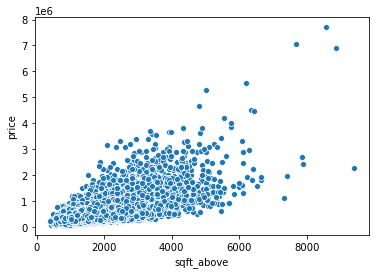

In [127]:
sns.scatterplot(x='sqft_above',y = 'price',data=bm_final)

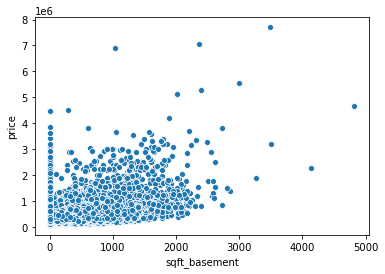

In [128]:
sns.scatterplot(x='sqft_basement', y='price',data=bm_final)

Filling the null values with mean and median

In [129]:
bm_final['sqft_basement']=bm_final['sqft_basement'].fillna(bm_final['sqft_basement'].median())
bm_final['sqft_above']=bm_final['sqft_above'].fillna(bm_final['sqft_above'].mean())

In [130]:
bm_final.isnull().sum()

date                0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built          971
yr_renovated     1102
zipcode          1060
lat              1027
long             1078
sqft_living15    1041
sqft_lot15       1059
price               0
sale_year           0
sale_month          0
dtype: int64

### 'yr_built'

Dropping the nan under yr_built column as the price range is same over the years and does not have an effect on the price except for some cases

In [131]:
bm_final.yr_built.fillna('nan',inplace=True)

In [132]:
bm_final['yr_built'].value_counts()

nan     971
2014    503
2005    410
2006    398
2004    385
       ... 
1933     29
1901     27
1902     25
1935     22
1934     21
Name: yr_built, Length: 117, dtype: int64

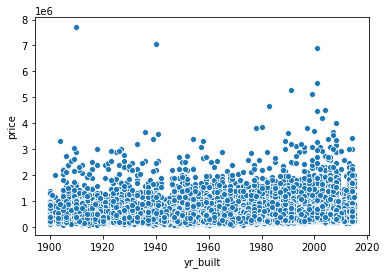

In [133]:
sns.scatterplot(x='yr_built',y='price',data=bm_final)

Dropping the column 'yr_built' as the price for the houses built across the years have the same sales price

In [134]:
bm_final = bm_final.drop(['yr_built'],axis=1)

In [135]:
bm_final.shape
bm_final.isnull().sum()

(20470, 21)

date                0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_renovated     1102
zipcode          1060
lat              1027
long             1078
sqft_living15    1041
sqft_lot15       1059
price               0
sale_year           0
sale_month          0
dtype: int64

### 'yr_renovated'

In [136]:
bm_final.yr_renovated.fillna('nan',inplace=True)
bm_final['yr_renovated'].value_counts()

0       18559
nan      1102
2014       81
2003       33
2013       31
        ...  
1954        1
1944        1
1948        1
1951        1
1959        1
Name: yr_renovated, Length: 71, dtype: int64

In [137]:
bm_final['yr_renovated'].unique()

array([0, 1991, 'nan', 2002, 2010, 1992, 2013, 2005, 2008, 2003, 1994,
       1984, 1954, 2014, 2011, 1974, 1999, 1983, 1990, 1988, 1957, 1977,
       1981, 1995, 1978, 2000, 1998, 1970, 1989, 2004, 1986, 2009, 2007,
       1987, 1973, 2006, 2001, 1980, 1971, 1945, 1979, 1997, 1950, 1948,
       2015, 2012, 1968, 1963, 1951, 1993, 1962, 1996, 1972, 1985, 1953,
       1955, 1982, 1956, 1969, 1940, 1946, 1975, 1958, 1964, 1976, 1959,
       1960, 1967, 1965, 1934, 1944], dtype=object)

In [138]:
bm_final.loc[((bm_final.yr_renovated != 0) & (bm_final.yr_renovated != 'nan')),'yr_renovated']='1'

In [139]:
bm_final['yr_renovated'].value_counts()

0      18559
nan     1102
1        809
Name: yr_renovated, dtype: int64

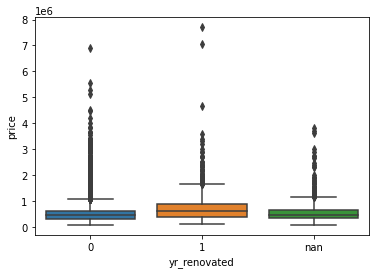

In [140]:
sns.boxplot(x='yr_renovated',y='price',data=bm_final)

We can infer that the price of houses which are renovated is higher when compared to the non-renovated houses

Imputing nan with value '0' as they both have compartively similar range

In [141]:
bm_final['yr_renovated'] = bm_final['yr_renovated'].replace({'nan':0})

In [142]:
bm_final['yr_renovated'].value_counts()
bm_final.isnull().sum()

0    19661
1      809
Name: yr_renovated, dtype: int64

date                0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_renovated        0
zipcode          1060
lat              1027
long             1078
sqft_living15    1041
sqft_lot15       1059
price               0
sale_year           0
sale_month          0
dtype: int64

### 'zipcode'

In [143]:
bm_final.zipcode.fillna('nan',inplace=True)
bm_final['zipcode'].value_counts()

nan      1060
98103     545
98038     537
98115     522
98052     516
         ... 
98102      91
98010      85
98024      69
98148      55
98039      44
Name: zipcode, Length: 71, dtype: int64

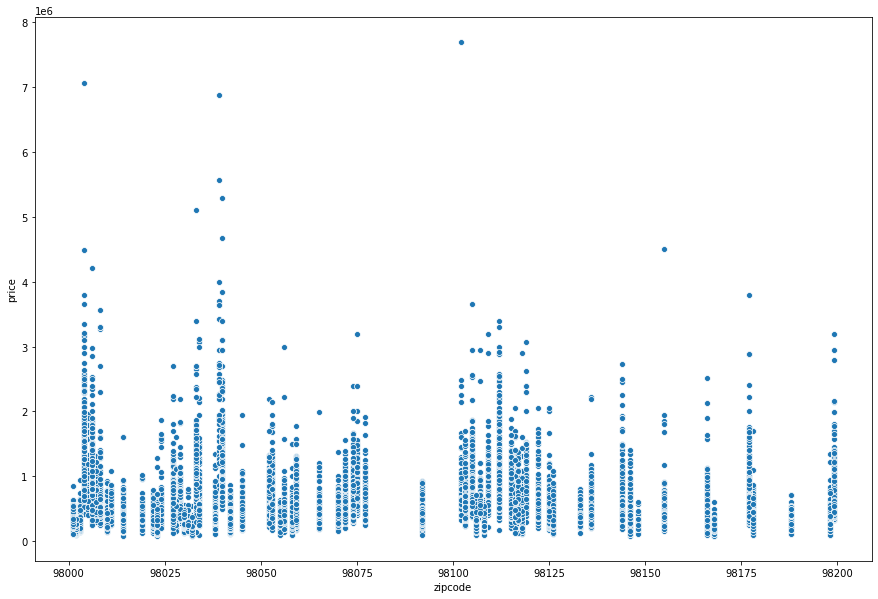

In [144]:
a4_dims = (15,10)
fig, ax = plt.subplots(figsize=a4_dims)
sns.scatterplot(x='zipcode',y='price',data=bm_final)

For the purpose of grouping the areas, we are calculating the price for each zipcode to form a group of zipcodes for easier analysis

In [145]:
bm_final['zipcode'].value_counts()
bm_price_floors = bm_final[['zipcode','price']]

nan      1060
98103     545
98038     537
98115     522
98052     516
         ... 
98102      91
98010      85
98024      69
98148      55
98039      44
Name: zipcode, Length: 71, dtype: int64

Index(['price', 'zipcode'], dtype='object')

,price,zipcode
zipcode,,
98002,2.343375e+05,98002
98168,2.392333e+05,98168
98032,2.510807e+05,98032
98001,2.817160e+05,98001
98023,2.854189e+05,98023
...,...,...
98102,9.076143e+05,98102
98112,1.101850e+06,98112
98040,1.191401e+06,98040


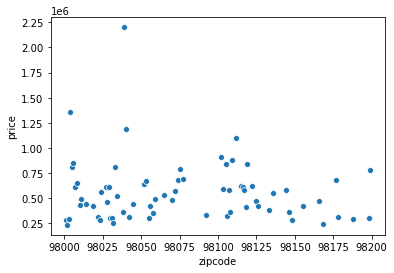

In [146]:
data = bm_price_floors.groupby('zipcode').mean()
data = pd.DataFrame(data)
data['zipcode'] = data.index
data.columns
data.sort_values('price')
sns.scatterplot(x='zipcode',y='price',data=data)

In [147]:
data.loc[((data.price < 300000)),'price']= 1
data.loc[((data.price >= 300000) & (data.price <= 600000)),'price']= 2
data.loc[((data.price > 600000) & (data.price <= 900000)),'price']= 3
data.loc[(data.price >= 900000),'price']= 4

In [148]:
data['price']. value_counts()

2.0    36
3.0    20
1.0    10
4.0     5
Name: price, dtype: int64

In [149]:
a = data.loc[data['price']==1]
a1 = a['zipcode'].unique()
a1
b = data.loc[data['price']==2]
b1 = b['zipcode'].unique()
b1
c = data.loc[data['price']==3]
c1 = c['zipcode'].unique()
c1
d = data.loc[data['price']==4]
d1 = d['zipcode'].unique()
d1

array([98001, 98002, 98003, 98023, 98030, 98031, 98032, 98148, 98168,
       98188], dtype=object)

array([98010, 98011, 98014, 98019, 98022, 98024, 98028, 98034, 98038,
       98042, 98045, 98055, 98056, 98058, 98059, 98065, 98070, 98072,
       98092, 98103, 98106, 98107, 98108, 98117, 98118, 98125, 98126,
       98133, 98136, 98144, 98146, 98155, 98166, 98178, 98198, 'nan'],
      dtype=object)

array([98005, 98006, 98007, 98008, 98027, 98029, 98033, 98052, 98053,
       98074, 98075, 98077, 98105, 98109, 98115, 98116, 98119, 98122,
       98177, 98199], dtype=object)

array([98004, 98039, 98040, 98102, 98112], dtype=object)

We have identifed the zipcodes to be combined

Dropping the null values and then proceeding with grouping of zipcodes

In [150]:
bm_final = bm_final[bm_final.zipcode != 'nan']
bm_final['zipcode'].isnull().sum()

0

In [151]:
bm_final['zipcode'] = bm_final['zipcode'].astype(object)

In [152]:
bm_final['zipcode'] = bm_final['zipcode'].replace(a1, '1')
bm_final['zipcode'] = bm_final['zipcode'].replace(b1, '2')
bm_final['zipcode'] = bm_final['zipcode'].replace(c1, '3')
bm_final['zipcode'] = bm_final['zipcode'].replace(d1, '4')

In [153]:
bm_final['zipcode'].value_counts()

2    10396
3     5880
1     2207
4      927
Name: zipcode, dtype: int64

In [154]:
bm_final.shape
bm_final.isnull().sum()

(19410, 21)

date                0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_renovated        0
zipcode             0
lat               976
long             1017
sqft_living15     984
sqft_lot15       1007
price               0
sale_year           0
sale_month          0
dtype: int64

### 'sqft_living15' and 'sqft_lot15'

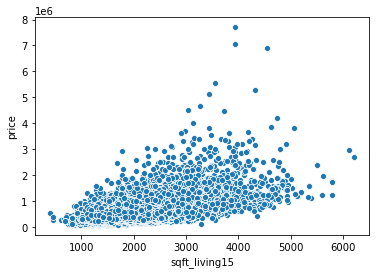

In [155]:
sns.scatterplot(x='sqft_living15',y='price',data=bm_final)

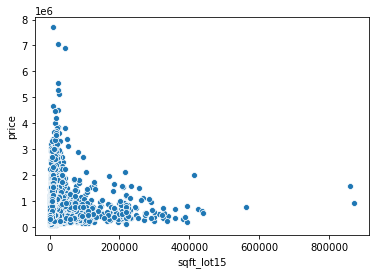

In [156]:
sns.scatterplot(x='sqft_lot15',y='price',data=bm_final)

In [157]:
bm_final['sqft_living15']=bm_final['sqft_living15'].fillna(bm_final['sqft_living15'].mean())
bm_final['sqft_lot15']=bm_final['sqft_lot15'].fillna(bm_final['sqft_lot15'].mean())

In [158]:
bm_final.isnull().sum()

date                0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_renovated        0
zipcode             0
lat               976
long             1017
sqft_living15       0
sqft_lot15          0
price               0
sale_year           0
sale_month          0
dtype: int64

###### Dropping the date, lat,long,yr_built column

In [159]:
bm_final = bm_final.drop(['date','lat','long'],axis=1)

## Dataset after cleaning null values

In [160]:
bm_final.shape

(19410, 18)

In [161]:
bm_final.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_renovated', 'zipcode', 'sqft_living15',
       'sqft_lot15', 'price', 'sale_year', 'sale_month'],
      dtype='object')

In [162]:
bm_final.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,zipcode,sqft_living15,sqft_lot15,price,sale_year,sale_month
0,3,1.00,1180.0,5650.0,1.0,0,0,3,2.0,1180.0,0.0,0,2,1340.0,5650.000000,221900,0,10
1,3,2.25,2570.0,7242.0,2.0,0,0,3,2.0,2170.0,400.0,1,2,1690.0,7639.000000,538000,0,12
2,2,1.00,770.0,10000.0,1.0,0,0,3,1.0,770.0,0.0,0,2,2720.0,8062.000000,180000,1,02
3,4,3.00,1960.0,5000.0,1.0,0,0,5,2.0,1050.0,910.0,0,2,1360.0,12729.291474,604000,0,12
4,3,2.00,1680.0,8080.0,1.0,0,0,3,3.0,1680.0,0.0,0,3,1800.0,7503.000000,510000,1,02


In [163]:
bm_final.dtypes

bedrooms           int64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
waterfront         int64
view               int64
condition          int64
grade            float64
sqft_above       float64
sqft_basement    float64
yr_renovated      object
zipcode           object
sqft_living15    float64
sqft_lot15       float64
price              int64
sale_year         object
sale_month        object
dtype: object

Columns 'zipcode', 'sale_month' should have dtype as object (i.e.) categorical

In [164]:
bm_final['yr_renovated'] = bm_final['yr_renovated'].astype(int)
bm_final['sale_year'] = bm_final['sale_year'].astype(int)

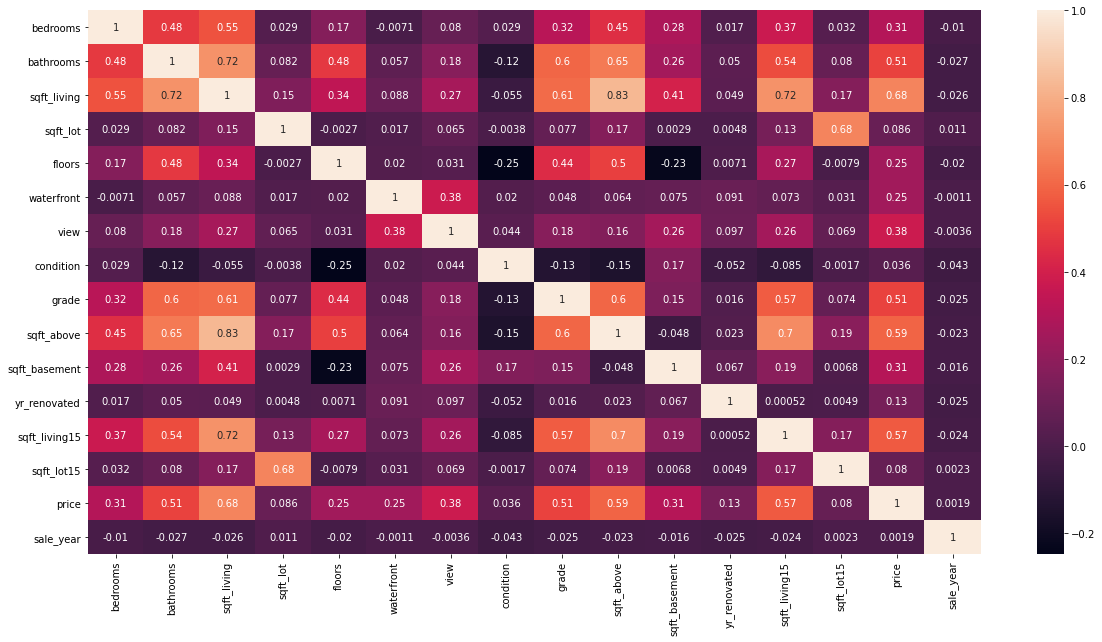

In [165]:
bmcor = bm_final.corr()
a4_dims = (20,10)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(bmcor,annot=True)

There is no correlation of greater than 0.7 between price and any other variable

Perfoming One-hot vector encoding for the column 'zipcode'

In [166]:
house_sales = pd.get_dummies(bm_final)

In [167]:
house_sales.shape
house_sales.head(10)

(19410, 32)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,sale_month_03,sale_month_04,sale_month_05,sale_month_06,sale_month_07,sale_month_08,sale_month_09,sale_month_10,sale_month_11,sale_month_12
0,3,1.00,1180.0,5650.0,1.0,0,0,3,2.0,1180.0,...,0,0,0,0,0,0,0,1,0,0
1,3,2.25,2570.0,7242.0,2.0,0,0,3,2.0,2170.0,...,0,0,0,0,0,0,0,0,0,1
2,2,1.00,770.0,10000.0,1.0,0,0,3,1.0,770.0,...,0,0,0,0,0,0,0,0,0,0
3,4,3.00,1960.0,5000.0,1.0,0,0,5,2.0,1050.0,...,0,0,0,0,0,0,0,0,0,1
4,3,2.00,1680.0,8080.0,1.0,0,0,3,3.0,1680.0,...,0,0,0,0,0,0,0,0,0,0
5,4,2.25,5420.0,7620.0,1.0,0,0,3,4.0,3890.0,...,0,0,1,0,0,0,0,0,0,0
6,3,2.25,1715.0,6819.0,2.0,0,0,3,2.0,1715.0,...,0,0,0,1,0,0,0,0,0,0
7,3,1.50,1060.0,9711.0,1.0,0,0,3,2.0,1060.0,...,0,0,0,0,0,0,0,0,0,0
9,3,2.25,1890.0,6560.0,2.0,0,0,3,2.0,1890.0,...,1,0,0,0,0,0,0,0,0,0
11,2,1.00,1160.0,6000.0,1.5,0,0,4,2.0,860.0,...,0,0,1,0,0,0,0,0,0,0


# Train and test split

In [168]:
X = house_sales.drop(['price'],axis=1)
y = house_sales['price']

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
y_train.shape
y_test.shape
X_train_org.shape
X_test_org.shape

(14557,)

(4853,)

(14557, 31)

(4853, 31)

# Scaling

In our dataset, there are outliers present. Hence, we are using StandardScaler as the MinMax scaler is very sensitive to the presence of outliers.

In [169]:
scaler = StandardScaler()

In [170]:
X_train_scale = scaler.fit_transform(X_train_org)

In [171]:
X_test_scale = scaler.transform(X_test_org)

# Linear Regression

In [173]:
from sklearn.model_selection import GridSearchCV
model = LinearRegression()
parameters = {'normalize':[True,False]}
grid_search_lr = GridSearchCV(model,parameters, cv=6, return_train_score=True)
grid_search_lr.fit(X_train_org, y_train)
print("Best parameters: {}".format(grid_search_lr.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_search_lr.best_score_))

GridSearchCV(cv=6, estimator=LinearRegression(),
             param_grid={'normalize': [True, False]}, return_train_score=True)

Best parameters: {'normalize': False}
Best cross-validation score: 0.7038


In [174]:
results = pd.DataFrame(grid_search_lr.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_normalize,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,mean_train_score,std_train_score
0,0.033335,0.002980,0.006661,0.002979,True,{'normalize': True},0.709665,0.715926,0.719496,0.697436,...,0.012524,2,0.706211,0.705035,0.704192,0.708146,0.711875,0.708403,0.70731,0.002544
1,0.026084,0.003114,0.002667,0.003771,False,{'normalize': False},0.709625,0.716089,0.719894,0.697534,...,0.012626,1,0.706213,0.705056,0.704224,0.708335,0.711885,0.708506,0.70737,0.002556


In [175]:
lreg = LinearRegression(normalize = True)
lreg.fit(X_train_org, y_train)
print(lreg.score(X_train_org, y_train))
print(lreg.score(X_test_org, y_test))

LinearRegression(normalize=True)

0.706984301954519
0.7057488751969796


In [176]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

  
kfold = KFold(n_splits=6)
print("Cross-validation scores:\n{}".format(cross_val_score(lreg , X_train_org, y_train, cv=kfold)))
scores = cross_val_score(lreg , X_train_org, y_train, cv=kfold)
print(np.mean(scores))

Cross-validation scores:
[0.70966501 0.7159264  0.71949625 0.69743579 0.68352913 0.69592347]
0.7036626750595398


LinearRegression(normalize=True)

Text(0.5, 0, 'sqft_living')

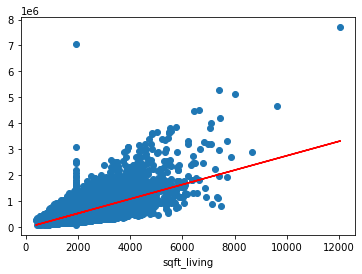

In [177]:
#PLOT

%matplotlib inline
import matplotlib.pyplot as plt

X_train_array = X_train_org.to_numpy()

X_train_rm = X_train_array[:,2].reshape(-1,1)
lreg.fit(X_train_rm, y_train)
y_predict = lreg.predict(X_train_rm)

plt.plot(X_train_rm, y_predict, c = 'r')
plt.scatter(X_train_rm,y_train)
plt.xlabel('sqft_living')

### Linear Regression Result:

Best parameter: {'normalize': False}

Average Cross validation score: 0.7038

Test score: 0.7057

# KNN Regression

In [178]:
grid_parms_knn = {'n_neighbors':[1,5,10,15,20]}

In [179]:
knn = KNeighborsRegressor()
grid_search_knn = GridSearchCV(knn, grid_parms_knn,cv=6,return_train_score=True,n_jobs= -1)
grid_search_knn.fit(X_train_scale, y_train)

GridSearchCV(cv=6, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 5, 10, 15, 20]},
             return_train_score=True)

In [180]:
print("Best parameters: {}".format(grid_search_knn.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_search_knn.best_score_))
pd.DataFrame(grid_search_knn.cv_results_)

Best parameters: {'n_neighbors': 10}
Best cross-validation score: 0.7051


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,mean_train_score,std_train_score
0,0.465546,0.016337,3.065680,0.133395,1,{'n_neighbors': 1},0.592134,0.622535,0.619786,0.530194,...,0.036362,5,1.000000,0.999999,0.999999,1.000000,0.999999,0.999999,1.000000,3.534154e-07
1,0.503986,0.014586,4.213305,0.153086,5,{'n_neighbors': 5},0.706762,0.718091,0.719769,0.719945,...,0.024725,2,0.793073,0.796259,0.795839,0.801643,0.808315,0.801902,0.799505,5.054212e-03
2,0.518894,0.054556,4.882056,0.268096,10,{'n_neighbors': 10},0.710293,0.715603,0.718787,0.714730,...,0.018597,1,0.751371,0.752285,0.750325,0.755682,0.764951,0.759882,0.755749,5.201584e-03
3,0.546427,0.030328,5.104177,0.157264,15,{'n_neighbors': 15},0.703744,0.704602,0.705748,0.704760,...,0.020413,3,0.727923,0.727950,0.729058,0.732734,0.741996,0.734926,0.732431,4.993087e-03
4,0.536090,0.029061,5.331768,0.196858,20,{'n_neighbors': 20},0.691185,0.700315,0.696074,0.696653,...,0.021291,4,0.710160,0.709361,0.708805,0.711955,0.723571,0.715168,0.713170,5.103458e-03


In [181]:
knn = KNeighborsRegressor(n_neighbors = 10)
knn.fit(X_train_scale, y_train)
print(knn.score(X_train_scale, y_train))
print(knn.score(X_test_scale, y_test))

KNeighborsRegressor(n_neighbors=10)

0.7596335157792412
0.7091584457948231


In [182]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

  
kfold = KFold(n_splits=6)
print("Cross-validation scores:\n{}".format(cross_val_score(knn , X_train_scale, y_train, cv=kfold)))
scores = cross_val_score(knn , X_train_scale, y_train, cv=kfold)
print(np.mean(scores))

Cross-validation scores:
[0.7102932  0.71560329 0.71878694 0.71472988 0.6644096  0.70653242]
0.7050592204685852


KNeighborsRegressor(n_neighbors=10)

Text(0.5, 0, 'sqft_living')

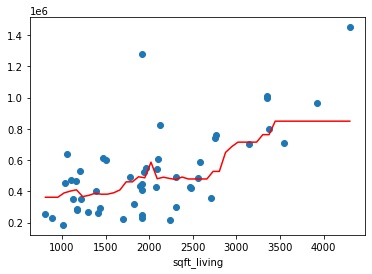

In [183]:
X_b = X_train_array[:50,2].reshape(-1,1)
y_b = y_train[:50]

knn_reg = KNeighborsRegressor(10)
knn_reg.fit(X_b, y_b)

X_new=np.linspace(X_b.min(), X_b.max(), 50).reshape(50, 1)
y_predict = knn_reg.predict(X_new)

plt.plot(X_new, y_predict, c = 'r')
plt.scatter(X_b, y_b)
plt.xlabel('sqft_living')

### KNN Regression Result:

Best parameter: {n_neighbors: 10}

Average Cross validation score: 0.7050

Test score: 0.7091

# Ridge Regression

In [184]:
grid_parms_ridge = {'alpha': [0.01, 0.1, 1, 10, 100]}

In [185]:
ridge = Ridge()
grid_search_ridge = GridSearchCV(estimator = ridge,param_grid = grid_parms_ridge,return_train_score=True,n_jobs= -1,cv=5)
grid_search_ridge.fit(X_train_org, y_train)
print("Best parameters: {}".format(grid_search_ridge.best_params_))

print("Best cross-validation score: {:.4f}".format(grid_search_ridge.best_score_))

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

Best parameters: {'alpha': 1}
Best cross-validation score: 0.7044


In [186]:
ridge = Ridge(alpha = 1)
ridge.fit(X_train_org, y_train)
print(ridge.score(X_train_org, y_train))
print(ridge.score(X_test_org, y_test))

Ridge(alpha=1)

0.7069981831976242
0.7058582864583794


In [187]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

  
kfold = KFold(n_splits=6)
print("Cross-validation scores:\n{}".format(cross_val_score(ridge , X_train_org, y_train, cv=kfold)))
scores = cross_val_score(ridge , X_train_org, y_train, cv=kfold)
print(np.mean(scores))

Cross-validation scores:
[0.70978705 0.71599989 0.71998249 0.6977393  0.68300811 0.69661804]
0.7038558124738912


In [188]:
result_ridge = pd.DataFrame(grid_search_ridge.cv_results_)
result_ridge

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.026628,0.006095,0.008918,0.006641,0.01,{'alpha': 0.01},0.711764,0.705579,0.714666,0.696597,...,0.704393,0.008293,3,0.705423,0.707091,0.704962,0.709036,0.710212,0.707345,0.002026
1,0.023396,0.004527,0.012127,0.009891,0.1,{'alpha': 0.1},0.711779,0.705577,0.714681,0.696576,...,0.704394,0.008303,2,0.705423,0.707091,0.704962,0.709036,0.710212,0.707345,0.002026
2,0.040387,0.019496,0.009229,0.006242,1,{'alpha': 1},0.711920,0.705553,0.714820,0.696372,...,0.704405,0.008399,1,0.705419,0.707087,0.704957,0.709033,0.710207,0.707340,0.002026
3,0.035818,0.009689,0.009683,0.006430,10,{'alpha': 10},0.712870,0.705046,0.715634,0.694395,...,0.704192,0.009250,4,0.705049,0.706754,0.704593,0.708758,0.709848,0.707000,0.002043
4,0.030267,0.005854,0.004025,0.004216,100,{'alpha': 100},0.710351,0.696113,0.709853,0.681547,...,0.696368,0.012253,5,0.696025,0.698660,0.695956,0.701624,0.701626,0.698778,0.002520


([<matplotlib.axis.XTick at 0x15926178>,
 [Text(0, 0, '0.01'),
  Text(0, 0, '0.1'),
  Text(0, 0, '1'),
  Text(0, 0, '10'),
  Text(0, 0, '100')])

Text(0.5, 0, 'Alpha')

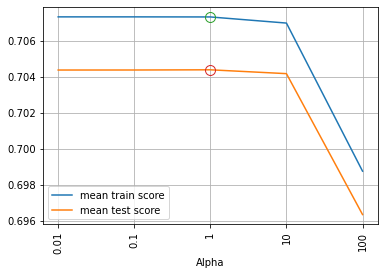

In [189]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(result_ridge.shape[0]), result_ridge['mean_train_score'], label = 'mean train score')
plt.plot(range(result_ridge.shape[0]), result_ridge['mean_test_score'], label = 'mean test score')
plt.xticks(range(result_ridge.shape[0]), result_ridge['param_alpha'], rotation = 90)
plt.plot([grid_search_ridge.best_index_], result_ridge['mean_train_score'][grid_search_ridge.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.plot([grid_search_ridge.best_index_], result_ridge['mean_test_score'][grid_search_ridge.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.grid()
plt.legend()
plt.xlabel('Alpha')

### Ridge Regression Result:

Best parameter: {'alpha': 1}

Average Cross validation score: 0.7038

Test score: 0.7058

# Lasso Regression

In [190]:
grid_parms_lasso = {'alpha': [0.01, 0.1, 1, 10,100]}

In [191]:
lasso = Lasso()
grid_search_lasso = GridSearchCV(estimator = lasso,param_grid = grid_parms_lasso,return_train_score=True,n_jobs=-1,cv=5)
grid_search_lasso.fit(X_train_org, y_train)
print("Best parameters: {}".format(grid_search_lasso.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_search_lasso.best_score_))

GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

Best parameters: {'alpha': 10}
Best cross-validation score: 0.7044


In [141]:
lass = Lasso(alpha = 10)
lass.fit(X_train_org, y_train)
print(lass.score(X_train_org, y_train))
print(lass.score(X_test_org, y_test))

Lasso(alpha=10, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

0.7069999591510197
0.7057416447269227


In [142]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

  
kfold = KFold(n_splits=6)
print("Cross-validation scores:\n{}".format(cross_val_score(lass , X_train_org, y_train, cv=kfold)))
scores = cross_val_score(lass , X_train_org, y_train, cv=kfold)
print(np.mean(scores))

Cross-validation scores:
[0.7096228  0.7160749  0.71994196 0.69756932 0.68323548 0.69658378]
0.7038380413758031


In [143]:
result_lasso = pd.DataFrame(grid_search_lasso.cv_results_)
result_lasso

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.353209,0.186871,0.007256,0.001912,0.01,{'alpha': 0.01},0.711763,0.705579,0.714665,0.696599,...,0.704393,0.008291,5,0.705423,0.707091,0.704962,0.709036,0.710212,0.707345,0.002026
1,3.576854,0.068750,0.007105,0.003076,0.1,{'alpha': 0.1},0.711763,0.705579,0.714665,0.696599,...,0.704393,0.008292,4,0.705423,0.707091,0.704962,0.709036,0.710212,0.707345,0.002026
2,1.758889,0.584525,0.005954,0.002353,1,{'alpha': 1},0.711764,0.705581,0.714668,0.696596,...,0.704394,0.008293,3,0.705423,0.707091,0.704962,0.709036,0.710212,0.707345,0.002026
3,0.592850,0.103912,0.009030,0.011775,10,{'alpha': 10},0.711776,0.705603,0.714698,0.696567,...,0.704398,0.008312,1,0.705422,0.707090,0.704961,0.709035,0.710211,0.707344,0.002026
4,0.282584,0.028904,0.006506,0.002697,100,{'alpha': 100},0.711878,0.705696,0.714951,0.696215,...,0.704397,0.008490,2,0.705370,0.707034,0.704907,0.708975,0.710157,0.707289,0.002025


([<matplotlib.axis.XTick at 0x1fd9f8c6c88>,
 <a list of 5 Text xticklabel objects>)

Text(0.5, 0, 'Alpha')

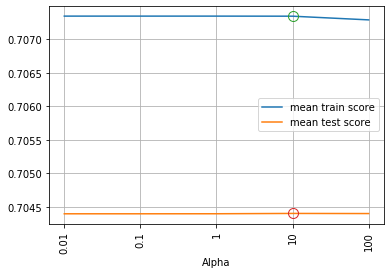

In [144]:
%matplotlib inline

plt.plot(range(result_lasso.shape[0]), result_lasso['mean_train_score'], label = 'mean train score')
plt.plot(range(result_lasso.shape[0]), result_lasso['mean_test_score'], label = 'mean test score')
plt.xticks(range(result_lasso.shape[0]), result_lasso['param_alpha'], rotation = 90)
plt.plot([grid_search_lasso.best_index_], result_lasso['mean_train_score'][grid_search_lasso.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.plot([grid_search_lasso.best_index_], result_lasso['mean_test_score'][grid_search_lasso.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.grid()
plt.legend()
plt.xlabel('Alpha')

### Lasso Regression Result:

Best parameter: {'alpha': 100}

Average Cross validation score: 0.7038

Test score: 0.7057

# Polynominal Regression

In [145]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

In [146]:
param_grid_poly = {'polynomialfeatures__degree': np.arange(3)}

grid_poly = GridSearchCV(PolynomialRegression(), param_grid_poly,return_train_score=True,n_jobs=-1,cv=5)

In [147]:
grid_poly.fit(X_train_org, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('polynomialfeatures',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=True,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('linearregression',
                                        LinearRegression(copy_X=True,
                                                         fit_intercept=True,
                                                         n_jobs=None,
                                                         normalize=False))],
                                verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'polynomialfeatures__degree': array([0, 1, 2])},
             pre_dispatch='

In [148]:
print("Best parameters: {}".format(grid_poly.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_poly.best_score_))

Best parameters: {'polynomialfeatures__degree': 2}
Best cross-validation score: 0.7915


In [149]:
pol = PolynomialFeatures(degree = 2)
X_pol = pol.fit_transform(X_train_org)
Xt_pol = pol.fit_transform(X_test_org)
pol_reg = LinearRegression()
pol_reg.fit(X_pol,y_train)
print(pol_reg.score(X_pol, y_train))
print(pol_reg.score(Xt_pol, y_test))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

0.8278011097032606
0.7942424473052565


In [150]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

  
kfold = KFold(n_splits=6)
print("Cross-validation scores:\n{}".format(cross_val_score(pol_reg , X_pol, y_train, cv=kfold)))
scores = cross_val_score(pol_reg , X_pol, y_train, cv=kfold)
print(np.mean(scores))

Cross-validation scores:
[0.78502321 0.7979335  0.78108883 0.79162343 0.809837   0.76740372]
0.7888182811260895


In [151]:
result_poly = pd.DataFrame(grid_poly.cv_results_)
result_poly

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_polynomialfeatures__degree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.012437,0.002573,0.002110,0.001110,0,{'polynomialfeatures__degree': 0},-0.000004,-0.000013,-0.001173,-0.000576,...,-0.000369,0.000454,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.048420,0.004095,0.007297,0.002061,1,{'polynomialfeatures__degree': 1},0.711763,0.705579,0.714664,0.696599,...,0.704393,0.008291,2,0.705423,0.707091,0.704962,0.709036,0.710212,0.707345,0.002026
2,1.099465,0.046975,0.064668,0.014644,2,{'polynomialfeatures__degree': 2},0.786828,0.790954,0.789968,0.811593,...,0.791462,0.011056,1,0.832264,0.832408,0.832171,0.824759,0.833154,0.830951,0.003115


([<matplotlib.axis.XTick at 0x1fd9f9783c8>,
 <a list of 3 Text xticklabel objects>)

Text(0.5, 0, 'Degree')

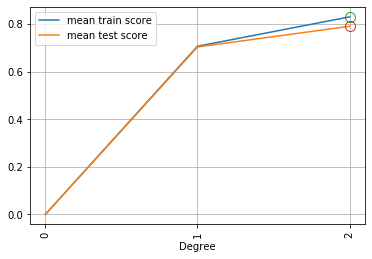

In [152]:

plt.plot(range(result_poly.shape[0]), result_poly['mean_train_score'], label = 'mean train score')
plt.plot(range(result_poly.shape[0]), result_poly['mean_test_score'], label = 'mean test score')
plt.xticks(range(result_poly.shape[0]), result_poly['param_polynomialfeatures__degree'], rotation = 90)
plt.plot([grid_poly.best_index_], result_poly['mean_train_score'][grid_poly.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.plot([grid_poly.best_index_], result_poly['mean_test_score'][grid_poly.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.grid()
plt.xlabel('Degree')
plt.legend()

### Polynominal Regression Result:

Best parameters: {'polynomialfeatures__degree': 2}

Average Cross validation score: 0.7888

Test score: 0.7942

# Linear (Simple) SVR

In [153]:
grid_parms_svrl = {'C': [0.01, 0.1, 1, 10, 100], 'epsilon' : [0.01, 0.1, 1, 10, 100]}

In [154]:
linearsvr = LinearSVR()
grid_svrl = GridSearchCV(estimator = linearsvr,param_grid = grid_parms_svrl,return_train_score=True,n_jobs= -1,cv=10)

In [155]:
grid_svrl.fit(X_train_scale,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LinearSVR(C=1.0, dual=True, epsilon=0.0,
                                 fit_intercept=True, intercept_scaling=1.0,
                                 loss='epsilon_insensitive', max_iter=1000,
                                 random_state=None, tol=0.0001, verbose=0),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'epsilon': [0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [156]:
print("Best parameters: {}".format(grid_svrl.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_svrl.best_score_))

Best parameters: {'C': 100, 'epsilon': 10}
Best cross-validation score: 0.5549


In [157]:
lsvr = LinearSVR(C = 100, epsilon = 1)
        
lsvr.fit(X_train_scale, y_train)

print(lsvr.score(X_train_scale, y_train))
print(lsvr.score(X_test_scale, y_test))

LinearSVR(C=100, dual=True, epsilon=1, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

0.5676259465714262
0.5714589745919514


In [158]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

  
kfold = KFold(n_splits=10)
print("Cross-validation scores:\n{}".format(cross_val_score(lsvr , X_train_scale, y_train, cv=kfold)))
scores = cross_val_score(lsvr, X_train_scale, y_train, cv=kfold)
print(np.mean(scores))

Cross-validation scores:
[0.5438185  0.57203006 0.56323625 0.555753   0.58539792 0.58296943
 0.55636097 0.51814406 0.52171033 0.54886689]
0.5548712794044903


In [159]:
result_linearsvr = pd.DataFrame(grid_svrl.cv_results_)
result_linearsvr

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_epsilon,params,split0_test_score,split1_test_score,split2_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.064522,0.005136,0.002878,0.001977,0.01,0.01,"{'C': 0.01, 'epsilon': 0.01}",-1.972890,-2.290680,-2.219066,...,-2.144307,-2.158298,-2.141810,-2.125369,-2.150347,-2.165854,-2.187593,-2.132913,-2.151607,0.018454
1,0.065998,0.004664,0.002690,0.002005,0.01,0.1,"{'C': 0.01, 'epsilon': 0.1}",-1.972890,-2.290680,-2.219066,...,-2.144307,-2.158298,-2.141810,-2.125369,-2.150347,-2.165854,-2.187593,-2.132913,-2.151607,0.018454
2,0.060206,0.002599,0.002000,0.001946,0.01,1,"{'C': 0.01, 'epsilon': 1}",-1.972890,-2.290680,-2.219066,...,-2.144307,-2.158298,-2.141810,-2.125369,-2.150347,-2.165854,-2.187593,-2.132913,-2.151607,0.018454
3,0.064692,0.005485,0.001503,0.001773,0.01,10,"{'C': 0.01, 'epsilon': 10}",-1.972890,-2.290680,-2.219066,...,-2.144307,-2.158298,-2.141810,-2.125369,-2.150347,-2.165854,-2.187593,-2.132913,-2.151607,0.018454
4,0.063528,0.003081,0.001998,0.003066,0.01,100,"{'C': 0.01, 'epsilon': 100}",-1.972890,-2.290680,-2.219066,...,-2.144307,-2.158298,-2.141810,-2.125369,-2.150347,-2.165854,-2.187593,-2.132913,-2.151607,0.018454
5,0.061185,0.006544,0.002440,0.001994,0.1,0.01,"{'C': 0.1, 'epsilon': 0.01}",-1.964194,-2.280832,-2.209328,...,-2.134949,-2.148911,-2.132455,-2.116149,-2.140916,-2.156418,-2.178057,-2.123570,-2.142217,0.018374
6,0.065425,0.009028,0.001870,0.001979,0.1,0.1,"{'C': 0.1, 'epsilon': 0.1}",-1.964194,-2.280832,-2.209328,...,-2.134949,-2.148911,-2.132455,-2.116149,-2.140916,-2.156418,-2.178057,-2.123570,-2.142217,0.018374
7,0.066129,0.007779,0.001425,0.002004,0.1,1,"{'C': 0.1, 'epsilon': 1}",-1.964194,-2.280832,-2.209328,...,-2.134949,-2.148911,-2.132455,-2.116149,-2.140916,-2.156418,-2.178057,-2.123570,-2.142217,0.018374
8,0.064609,0.012102,0.001606,0.002114,0.1,10,"{'C': 0.1, 'epsilon': 10}",-1.964194,-2.280832,-2.209328,...,-2.134949,-2.148911,-2.132455,-2.116149,-2.140916,-2.156418,-2.178057,-2.123570,-2.142217,0.018374
9,0.058471,0.006269,0.001238,0.001697,0.1,100,"{'C': 0.1, 'epsilon': 100}",-1.964194,-2.280832,-2.209328,...,-2.134949,-2.148911,-2.132455,-2.116149,-2.140916,-2.156418,-2.178057,-2.123570,-2.142217,0.018374


([<matplotlib.axis.XTick at 0x1fd9f9fb9b0>,
 <a list of 25 Text xticklabel objects>)

Text(0.5, 0, 'Alpha')

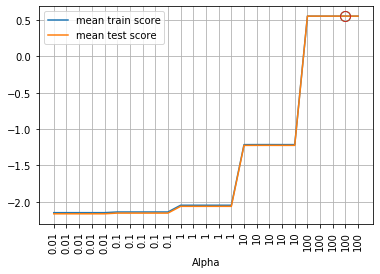

In [160]:
plt.plot(range(result_linearsvr.shape[0]), result_linearsvr['mean_train_score'], label = 'mean train score')
plt.plot(range(result_linearsvr.shape[0]), result_linearsvr['mean_test_score'], label = 'mean test score')
plt.xticks(range(result_linearsvr.shape[0]), result_linearsvr['param_C'], rotation = 90)
plt.plot([grid_svrl.best_index_], result_linearsvr['mean_train_score'][grid_svrl.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.plot([grid_svrl.best_index_], result_linearsvr['mean_test_score'][grid_svrl.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.grid()
plt.legend()
plt.xlabel('Alpha')

### Linear (Simple) SVR  Result:

Best parameters: {'C': 100, 'epsilon': 1}

Average Cross validation score: 0.5548

Test score: 0.5714

# SVR with kernel 'Linear'

In [161]:
grid_parms_linear = {'C': [0.01,0.1, 1, 10, 100]}

In [162]:
svr_linear = SVR(kernel='linear')
grid_svr_linear = GridSearchCV(estimator = svr_linear,param_grid = grid_parms_linear,return_train_score=True,n_jobs= -1,cv=6)

In [163]:
grid_svr_linear.fit(X_train_scale,y_train)

GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated',
                           kernel='linear', max_iter=-1, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1, param_grid={'C': [0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [164]:
print("Best parameters: {}".format(grid_svr_linear.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_svr_linear.best_score_))

Best parameters: {'C': 100}
Best cross-validation score: 0.6314


In [165]:
svr = SVR(kernel = 'linear',C = 100)
        
        #train the model
svr.fit(X_train_scale, y_train)
        
        #evaluate the model
print(svr.score(X_train_scale, y_train))
print(svr.score(X_test_scale, y_test))

SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

0.6348349244684914
0.6353862043822313


In [166]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=6)
print("Cross-validation scores:\n{}".format(cross_val_score(svr , X_train_scale, y_train, cv=kfold)))
scores = cross_val_score(svr , X_train_scale, y_train, cv=kfold)
print(np.mean(scores))

Cross-validation scores:
[0.63422537 0.63669211 0.64669841 0.64797949 0.5816611  0.64105024]
0.6313844530856692


In [167]:
result_svr_linear = pd.DataFrame(grid_svr_linear.cv_results_)
result_svr_linear

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,mean_train_score,std_train_score
0,27.320662,0.404486,3.332883,0.072339,0.01,{'C': 0.01},-0.054742,-0.061662,-0.054574,-0.057759,...,0.004656,5,-0.058992,-0.057824,-0.057455,-0.058377,-0.059391,-0.057003,-0.058174,0.000837
1,27.429692,0.486008,3.346784,0.068195,0.1,{'C': 0.1},-0.041476,-0.048757,-0.040642,-0.043708,...,0.004734,4,-0.045785,-0.045157,-0.043882,-0.045076,-0.046510,-0.045062,-0.045245,0.000798
2,26.220203,0.255432,3.288037,0.050573,1,{'C': 1},0.070101,0.064286,0.073345,0.072721,...,0.007385,3,0.064904,0.065756,0.066958,0.065361,0.067098,0.063688,0.065628,0.001176
3,27.259319,1.066409,3.357370,0.044849,10,{'C': 10},0.457867,0.459039,0.466940,0.472309,...,0.024841,2,0.449767,0.452084,0.450769,0.450361,0.460493,0.449161,0.452106,0.003858
4,15.662856,0.237806,1.837903,0.035668,100,{'C': 100},0.634225,0.636692,0.646698,0.647979,...,0.022773,1,0.629512,0.628955,0.623595,0.631106,0.638699,0.627956,0.629971,0.004535


([<matplotlib.axis.XTick at 0x1fd9ff56470>,
 <a list of 5 Text xticklabel objects>)

Text(0.5, 0, 'C')

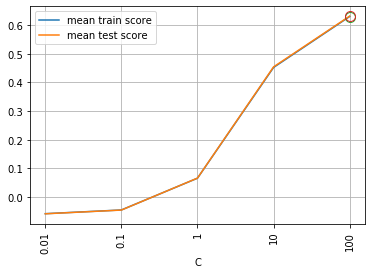

In [168]:
plt.plot(range(result_svr_linear.shape[0]), result_svr_linear['mean_train_score'], label = 'mean train score')
plt.plot(range(result_svr_linear.shape[0]), result_svr_linear['mean_test_score'], label = 'mean test score')
plt.xticks(range(result_svr_linear.shape[0]), result_svr_linear['param_C'], rotation = 90)
plt.plot([grid_svr_linear.best_index_], result_svr_linear['mean_train_score'][grid_svr_linear.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.plot([grid_svr_linear.best_index_], result_svr_linear['mean_test_score'][grid_svr_linear.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.grid()
plt.legend()
plt.xlabel('C')

### SVR with Kernel as 'Linear' Result:

Best parameters: {'C': 100}

Average Cross validation score: 0.6313

Test score: 0.6353

# SVR with kernel 'Poly'

In [169]:
grid_parms_svrp = {'C': [1, 10, 100],'degree':[1,3]}

In [170]:
svr_poly = SVR(kernel='poly')
grid_svr_poly = GridSearchCV(estimator = svr_poly,param_grid = grid_parms_svrp,return_train_score=True,n_jobs= -1,cv=3)

In [171]:
grid_svr_poly.fit(X_train_scale,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='poly',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [1, 10, 100], 'degree': [1, 3]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [172]:
print("Best parameters: {}".format(grid_svr_poly.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_svr_poly.best_score_))
pd.DataFrame(grid_svr_poly.cv_results_)

Best parameters: {'C': 100, 'degree': 1}
Best cross-validation score: 0.2062


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,14.498907,0.041193,4.631024,0.126628,1,1,"{'C': 1, 'degree': 1}",-0.055799,-0.050834,-0.058744,-0.055125,0.003264,6,-0.056199,-0.053309,-0.055949,-0.055152,0.001307
1,14.305654,0.086732,4.967052,0.100506,1,3,"{'C': 1, 'degree': 3}",-0.055325,-0.050685,-0.057358,-0.054456,0.002793,5,-0.055672,-0.052375,-0.055018,-0.054355,0.001425
2,15.982145,0.304590,4.600349,0.302120,10,1,"{'C': 10, 'degree': 1}",-0.024366,-0.017246,-0.030260,-0.023957,0.005321,3,-0.025289,-0.021385,-0.025392,-0.024022,0.001865
3,15.743284,0.281034,4.793856,0.259102,10,3,"{'C': 10, 'degree': 3}",-0.024372,-0.024174,-0.024429,-0.024325,0.000109,4,-0.024221,-0.017784,-0.026391,-0.022799,0.003655
4,12.637298,0.144064,3.299894,0.060482,100,1,"{'C': 100, 'degree': 1}",0.209911,0.219135,0.189588,0.206212,0.012342,1,0.204808,0.204141,0.209217,0.206055,0.002252
5,12.474434,0.247785,3.334822,0.039191,100,3,"{'C': 100, 'degree': 3}",0.179405,0.137624,0.198321,0.171784,0.025358,2,0.183041,0.206597,0.166385,0.185341,0.016497


In [174]:
svr_p = SVR(kernel='poly',C=100,degree = 1)
svr_p.fit(X_train_scale, y_train)
svr_p.score(X_train_scale, y_train)
svr_p.score(X_test_scale, y_test)

SVR(C=100, cache_size=200, coef0=0.0, degree=1, epsilon=0.1,
    gamma='auto_deprecated', kernel='poly', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

0.2837454148754319

0.29004952647656823

In [175]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
#scores = cross_val_score(logreg, iris.data, iris.target)
kfold = KFold(n_splits=6)
print("Cross-validation scores:\n{}".format(cross_val_score(svr_p, X_train_scale, y_train, cv=kfold)))
scores = cross_val_score(svr_p, X_train_scale, y_train, cv=kfold)
print(np.mean(scores))

C:\Users\sures\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\sures\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\sures\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\sures\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

Cross-validation scores:
[0.25259198 0.25069119 0.25842774 0.26232613 0.21306053 0.25761964]


C:\Users\sures\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\sures\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\sures\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\sures\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

0.24911953373197618


In [176]:
result_svr_poly= pd.DataFrame(grid_svr_poly.cv_results_)
result_svr_poly

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,14.498907,0.041193,4.631024,0.126628,1,1,"{'C': 1, 'degree': 1}",-0.055799,-0.050834,-0.058744,-0.055125,0.003264,6,-0.056199,-0.053309,-0.055949,-0.055152,0.001307
1,14.305654,0.086732,4.967052,0.100506,1,3,"{'C': 1, 'degree': 3}",-0.055325,-0.050685,-0.057358,-0.054456,0.002793,5,-0.055672,-0.052375,-0.055018,-0.054355,0.001425
2,15.982145,0.304590,4.600349,0.302120,10,1,"{'C': 10, 'degree': 1}",-0.024366,-0.017246,-0.030260,-0.023957,0.005321,3,-0.025289,-0.021385,-0.025392,-0.024022,0.001865
3,15.743284,0.281034,4.793856,0.259102,10,3,"{'C': 10, 'degree': 3}",-0.024372,-0.024174,-0.024429,-0.024325,0.000109,4,-0.024221,-0.017784,-0.026391,-0.022799,0.003655
4,12.637298,0.144064,3.299894,0.060482,100,1,"{'C': 100, 'degree': 1}",0.209911,0.219135,0.189588,0.206212,0.012342,1,0.204808,0.204141,0.209217,0.206055,0.002252
5,12.474434,0.247785,3.334822,0.039191,100,3,"{'C': 100, 'degree': 3}",0.179405,0.137624,0.198321,0.171784,0.025358,2,0.183041,0.206597,0.166385,0.185341,0.016497


([<matplotlib.axis.XTick at 0x1fd9ffd6048>,
 <a list of 6 Text xticklabel objects>)

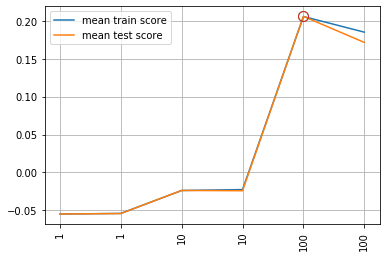

In [177]:
plt.plot(range(result_svr_poly.shape[0]), result_svr_poly['mean_train_score'], label = 'mean train score')
plt.plot(range(result_svr_poly.shape[0]), result_svr_poly['mean_test_score'], label = 'mean test score')
plt.xticks(range(result_svr_poly.shape[0]), result_svr_poly['param_C'], rotation = 90)
plt.plot([grid_svr_poly.best_index_], result_svr_poly['mean_train_score'][grid_svr_poly.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.plot([grid_svr_poly.best_index_], result_svr_poly['mean_test_score'][grid_svr_poly.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.grid()
plt.legend()

### SVR with Kernel as 'Poly' Result:

Best parameters: {'C': 100, 'degree': 1}

Average Cross validation score: 0.2491

Test score: 0.2900

# SVR with kernel 'rbf'

In [178]:
grid_parms_rbf = {'C': [0.1, 1, 10, 100],'gamma':[0.1, 1, 10, 100]}

In [179]:
svr_rbf = SVR(kernel='rbf')
grid_svr_rbf = GridSearchCV(estimator = svr_rbf,param_grid = grid_parms_rbf,return_train_score=True,n_jobs= -1,cv=3)

In [180]:
grid_svr_rbf.fit(X_train_scale,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [181]:
print("Best parameters: {}".format(grid_svr_rbf.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_svr_rbf.best_score_))

Best parameters: {'C': 100, 'gamma': 0.1}
Best cross-validation score: -0.0412


In [193]:
svr_rbf = SVR(kernel='rbf',C=100,gamma=0.1)
svr_rbf.fit(X_train_scale, y_train)
svr_rbf.score(X_train_scale, y_train)
svr_rbf.score(X_test_scale, y_test)

SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

-0.032844858673138466

-0.03450470646512982

In [183]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=6)
print("Cross-validation scores:\n{}".format(cross_val_score(svr_rbf, X_train_scale, y_train, cv=kfold)))
scores = cross_val_score(svr_rbf, X_train_scale, y_train, cv=kfold)
print(np.mean(scores))

Cross-validation scores:
[-0.03381093 -0.04146735 -0.03190031 -0.03328871 -0.03862546 -0.04433172]
-0.03723741473126533


In [184]:
result_rbf = pd.DataFrame(grid_svr_rbf.cv_results_)
result_rbf

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,11.330334,0.125268,3.097708,0.139693,0.1,0.1,"{'C': 0.1, 'gamma': 0.1}",-0.059580,-0.054365,-0.061541,-0.058495,0.003028,6,-0.059921,-0.056656,-0.058974,-0.058517,0.001371
1,12.243555,0.381897,3.180818,0.358904,0.1,1,"{'C': 0.1, 'gamma': 1}",-0.059598,-0.054388,-0.061547,-0.058511,0.003022,9,-0.059939,-0.056678,-0.058981,-0.058533,0.001369
2,12.032121,0.478521,4.028549,0.353016,0.1,10,"{'C': 0.1, 'gamma': 10}",-0.059598,-0.054389,-0.061547,-0.058511,0.003022,10,-0.059940,-0.056678,-0.058981,-0.058533,0.001369
3,13.576654,0.615906,5.750605,0.626988,0.1,100,"{'C': 0.1, 'gamma': 100}",-0.059598,-0.054389,-0.061547,-0.058511,0.003022,11,-0.059940,-0.056678,-0.058981,-0.058533,0.001369
4,10.657468,0.084945,3.655548,0.062237,1,0.1,"{'C': 1, 'gamma': 0.1}",-0.059412,-0.054148,-0.061467,-0.058342,0.003082,4,-0.059744,-0.056457,-0.058887,-0.058362,0.001392
5,11.766167,0.103654,3.543514,0.137770,1,1,"{'C': 1, 'gamma': 1}",-0.059593,-0.054384,-0.061547,-0.058508,0.003023,8,-0.059931,-0.056671,-0.058977,-0.058526,0.001369
6,11.654134,0.049942,4.158866,0.026475,1,10,"{'C': 1, 'gamma': 10}",-0.059597,-0.054389,-0.061548,-0.058512,0.003022,12,-0.059936,-0.056675,-0.058979,-0.058530,0.001369
7,13.023799,0.016312,5.219028,0.035598,1,100,"{'C': 1, 'gamma': 100}",-0.059598,-0.054389,-0.061548,-0.058512,0.003022,13,-0.059936,-0.056675,-0.058979,-0.058530,0.001369
8,10.410131,0.081175,3.290524,0.038172,10,0.1,"{'C': 10, 'gamma': 0.1}",-0.057719,-0.052482,-0.060441,-0.056881,0.003302,2,-0.057960,-0.054952,-0.057727,-0.056880,0.001367
9,11.356603,0.081094,3.384267,0.019435,10,1,"{'C': 10, 'gamma': 1}",-0.059543,-0.054339,-0.061531,-0.058471,0.003033,5,-0.059850,-0.056603,-0.058928,-0.058461,0.001366


([<matplotlib.axis.XTick at 0x1fda0046518>,
 <a list of 6 Text xticklabel objects>)

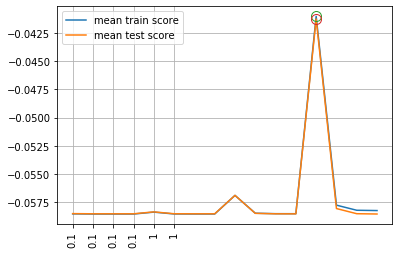

In [185]:
plt.plot(range(result_rbf.shape[0]), result_rbf['mean_train_score'], label = 'mean train score')
plt.plot(range(result_rbf.shape[0]), result_rbf['mean_test_score'], label = 'mean test score')
plt.xticks(range(result_svr_poly.shape[0]), result_rbf['param_C'], rotation = 90)
plt.plot([grid_svr_rbf.best_index_], result_rbf['mean_train_score'][grid_svr_rbf.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.plot([grid_svr_rbf.best_index_], result_rbf['mean_test_score'][grid_svr_rbf.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.grid()
plt.legend()

### SVR with Kernel as 'rbf' Result:

Best parameters: {'C': 100, 'gamma': 0.1}

Average Cross validation score: -0.0372

Test score: -0.0345

# Best Model for the prediction

Based on the cross validation score and the test score for above models, it is inferred that the polynominal regression is the best model to predict the house prices.

In [201]:
d = {'Model': ['Linear Regression', 'KNN Regression','Ridge Regression','Lasso Regression','Polynominal Regression','Simple SVR','SVR with Linear kernel','SVR with Poly kernel','SVR with rbf kernel'], 
     'Cross-Validation Score': [grid_search_lr.best_score_, grid_search_knn.best_score_,grid_search_ridge.best_score_,grid_search_lasso.best_score_,grid_poly.best_score_,grid_svrl.best_score_,grid_svr_linear.best_score_,grid_svr_poly.best_score_,grid_svr_rbf.best_score_]}

In [204]:
result = pd.DataFrame(data=d)
result

,Model,Cross-Validation Score
0,Linear Regression,0.703833
1,KNN Regression,0.705060
2,Ridge Regression,0.704406
3,Lasso Regression,0.704398
4,Polynominal Regression,0.791462
5,Simple SVR,0.554950
6,SVR with Linear kernel,0.631385
7,SVR with Poly kernel,0.206212
8,SVR with rbf kernel,-0.041249


In [187]:
pol = PolynomialFeatures(degree = 2)
X_pol = pol.fit_transform(X_train_org)
Xt_pol = pol.fit_transform(X_test_org)
pol_reg = LinearRegression()
pol_reg.fit(X_pol,y_train)
ypred = pol_reg.predict(Xt_pol)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [195]:
with np.printoptions(threshold=np.inf):
    print(ypred)

[ 341597.40040728  702660.62726908  484603.9052442   429292.390924
  378652.15614089  291040.97503573  910605.41031334  921098.78258406
  460615.36765849  586550.24702009  731334.69904633  394656.6315059
  475202.15136696  426664.17566913  822988.67983069  758345.93563601
  654118.67215681  666314.05665389  298052.69265396  590541.03637684
  559036.23678609  385056.74812627  221439.20806613  547969.07705364
  337678.51230448  753764.27594396  429842.28582262  224481.99298393
  478859.63070237  431387.78808331  489926.17724677  414933.22694872
  292005.74726543  332530.19191765  852038.64820287  265889.67016193
  316979.95360975  262764.64894809  548419.99999253  384401.00567746
  457103.39279147  750351.72843836 1187277.64062186  794662.97705005
  426535.9462004   397197.19972121  689789.19742275  474511.31364627
  379114.87023796  883924.68498636 1041520.18617112  751244.89115981
  513184.7653153   339289.05826937  333057.43847961  479922.42780261
  436867.24486438  231423.59747122  2